In [85]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline

In [87]:
import bokeh
bokeh.sampledata.download()

Using data directory: C:\Users\woori\.bokeh\data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [88]:
# 크롤링 start_date, end_date
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2020-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-26


In [89]:
## 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [90]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [91]:
# SOX 지수
SOX = yf.download("^SOX", start=start_date, end=end_date)
SOX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOX = SOX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [92]:
SOX

,SOXX_Close
Date,
2019-12-31,1849.619995
2020-01-02,1887.910034
2020-01-03,1853.979980
2020-01-06,1834.680054
2020-01-07,1867.280029
...,...
2021-01-19,3093.320068
2021-01-20,3085.040039
2021-01-21,3132.169922


In [93]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOX'] = SOX
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_

In [94]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [95]:
df = model_samsung

In [96]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2020-02-20 to 2021-01-25
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          223 non-null    int32  
 1   High          223 non-null    int32  
 2   Low           223 non-null    int32  
 3   Close         223 non-null    int32  
 4   Volume        223 non-null    int32  
 5   macd          223 non-null    float64
 6   macdsignal9   223 non-null    float64
 7   macdhist      223 non-null    float64
 8   US            223 non-null    float64
 9   SNP500        223 non-null    float64
 10  RUSSELL2000   223 non-null    float64
 11  NASDAQ        223 non-null    float64
 12  MSCI_KR       223 non-null    int64  
 13  SOX           223 non-null    float64
 14  TREASURY_5Y   223 non-null    float64
 15  TREASURY_10Y  223 non-null    float64
 16  TREASURY_30Y  223 non-null    float64
dtypes: float64(11), int32(5), int64(1)
memory usage: 27.0 

In [98]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
output = min_max_scaler.transform(df)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
print(output.head())

                Open      High       Low     Close    Volume      macd  \
2020-02-20  0.379455  0.333333  0.366525  0.360825  0.065071  0.466730   
2020-02-21  0.339623  0.305164  0.343220  0.344330  0.055013  0.454201   
2020-02-24  0.310273  0.273239  0.307203  0.294845  0.201340  0.422708   
2020-02-25  0.285115  0.271362  0.294492  0.317526  0.179828  0.407644   
2020-02-26  0.280922  0.252582  0.290254  0.288660  0.199556  0.383532   

            macdsignal9  macdhist        US    SNP500  RUSSELL2000    NASDAQ  \
2020-02-20     0.452744  0.518790  0.642212  0.702014     0.598599  0.426592   
2020-02-21     0.449611  0.478724  0.652029  0.680085     0.583772  0.400855   
2020-02-24     0.439625  0.385223  0.715892  0.610948     0.540880  0.348413   
2020-02-25     0.428058  0.363656  0.699372  0.550576     0.493156  0.310678   
2020-02-26     0.413078  0.317085  0.682324  0.543270     0.476902  0.312917   

             MSCI_KR       SOX  TREASURY_5Y  TREASURY_10Y  TREASURY_30Y  


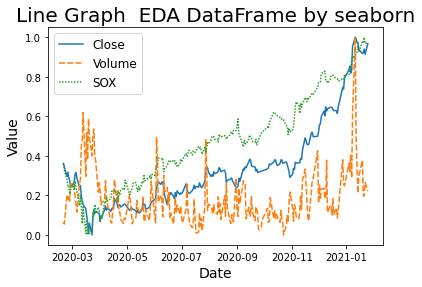

In [99]:
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'Volume', 'SOX']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

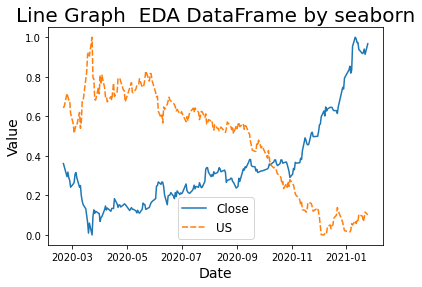

In [100]:
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'US']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

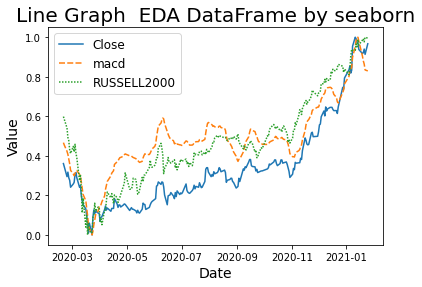

In [101]:
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'macd', 'RUSSELL2000']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

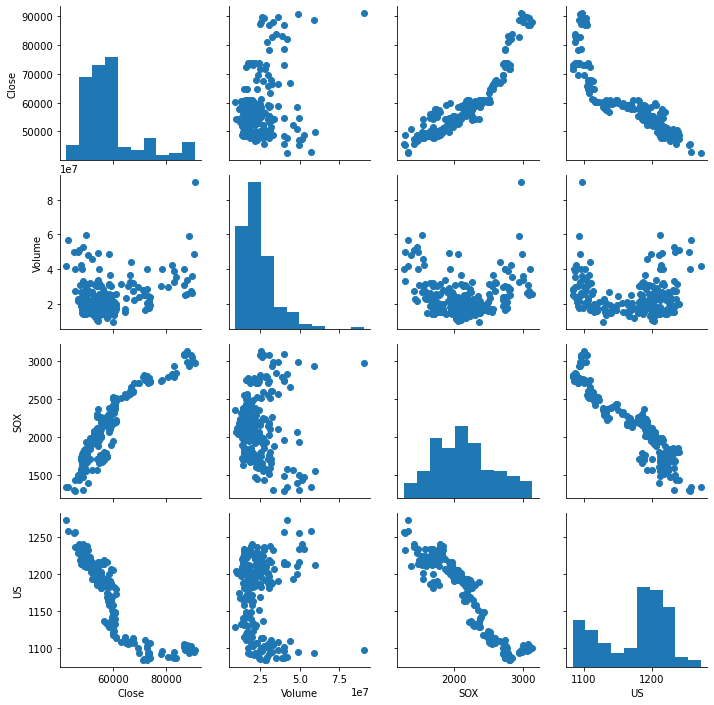

In [102]:
g = sns.PairGrid(df[[ 'Close',  'Volume', 'SOX', 'US']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [103]:
#!pip install jinja2

In [104]:
#!pip install flask

In [105]:
import tkinter as tk
p= figure(plot_width=700, plot_height=300, x_axis_type='datetime')
p.line(df.index, df['Close'], color='navy', alpha=0.5)
show(p)

In [74]:
import jinja2
from bokeh.embed import components
template = jinja2.Template('''\
<html>
<link href='http://cdn.pydata.org/bokeh/release/bokeh-1.0.2.win.css' rel='stylesheet' type='text/css'>
<script src='http://cdn.pydata.org/bokeh/release/bokeh-1.0.2.win.js'></script>
<head><title>bokeh test</title>
<head>
<body>
<h1>This site ofr Bokeh Test</h1>

이 사이트는 보케를 테스트하기 위한 공간입니다.
{{script}}
{{div}}

</body>
</html>
'''
)

In [106]:
script, div = components(p)

from IPython.display import HTML
HTML(template.render(script=script, div=div))

In [107]:
with open('a.html', 'w') as f:
    template.render(script=script, div=div)

import webbrowser
webbrowser.open('a.html')

True